In [27]:
!pip install scikit-learn

In [28]:
!pip install matplotlib seaborn

In [29]:

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

drive.mount("/content/drive")

dfpath = "/content/drive/MyDrive/Colab Notebooks/ProjectData/Final_data.csv"
df = pd.read_csv(dfpath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df['is_healthy'] = (
    (df['BMI'].between(18.5, 24.9)) &
    (df['Fat_Percentage'] < 25) &
    (df['protein_per_kg'] > 0.8)
).astype(int)

## Features used in My Model


For my model, I will be the following features:
protein_per_kg
*   protein_per_kg
*   Fat_Percentage
*   Calories
*   protein_per_kg
*   Calories
*   BMI
*   Daily meals frequency

I chose these features because they showed clear patterns in my EDA. These features also made sense for predicting whether a person is healthy or unhealthy. I did not include Proteins, Carbs, and Fats because they had a perfect correlation (1.0) with each other, which means they were giving duplicate information to the model.

In [31]:
healthy_unhealthy_cols = [
    'protein_per_kg',
    'Fat_Percentage',
    'Calories',
    'BMI',
    'Daily meals frequency'
]

X = df[healthy_unhealthy_cols]
y = df['is_healthy']

In [32]:
y = df['is_healthy']

features = ['protein_per_kg', 'Fat_Percentage', 'Calories', 'BMI', 'Daily meals frequency']

X = df[features]

I added a new feature called is_healthy because the original dataset did not have one. I created this column using health-related features from the dataset, based on patterns I saw in my EDA. This new feature is the target for my models and lets them predict whether a person is healthy or unhealthy.

is_healthy = 1 means the person is considered healthy.
is_healthy = 0 means the person is considered unhealthy.

This will becomes the target for my machine learning models. It allows the models to learn a simple yes/no classification and predict health status using the other features in the dataset.

##Train / Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


##Baseline Model: Decision Tree

In [34]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("=== Decision Tree Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))
print(classification_report(y_test, y_pred_dt))

=== Decision Tree Results ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3019
           1       1.00      1.00      1.00       981

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



For my baseline model, I selected a Decision Tree because it is simple, interpretable, and helps reveal which features play the biggest role in predicting health status. It is also a good starting point for comparing performance with more advanced models.

##Confusion Matrix - Decision Tree

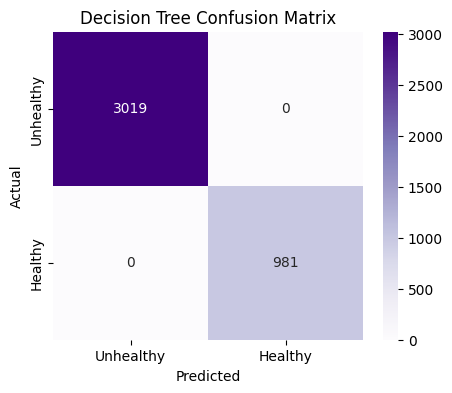

In [35]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_dt),
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=['Unhealthy', 'Healthy'],
    yticklabels=['Unhealthy', 'Healthy']
)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##Advanced Model: Random Forest

In [36]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(classification_report(y_test, y_pred_rf))

=== Random Forest Results ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3019
           1       1.00      1.00      1.00       981

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



For my advanced model, I chose a Random Forest because it reduces overfitting, handles non-linear relationships, and captures interactions between features. My EDA showed that BMI, Fat_Percentage, Calories, and protein_per_kg interact in complex ways, making Random Forest a strong choice for improving predictive accuracy and stability.

##Tuned Random Forest with GridSearchCV

Here I use GridSearchCV to search over different hyperparameters for the Random Forest (number of trees, depth, max_features, etc.). This helps me find a better model and also see which features are most important for predicting is_healthy.

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf_base = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)
print("\nBest cross-validation accuracy:", round(grid_search.best_score_, 4))


best_rf = grid_search.best_estimator_

y_pred_rf_gs = best_rf.predict(X_test)

print("\n=== Tuned Random Forest Results ===")
print("Test Accuracy:", round(accuracy_score(y_test, y_pred_rf_gs), 4))
print(classification_report(y_test, y_pred_rf_gs))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters from GridSearchCV:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validation accuracy: 0.9998

=== Tuned Random Forest Results ===
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3019
           1       1.00      1.00      1.00       981

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



Feature Importance from Tuned Random Forest

I use the feature_importances_ attribute of the best Random Forest model to see which features contribute most to predicting whether a person is healthy.

BMI                      0.512109
Fat_Percentage           0.418594
Calories                 0.045325
protein_per_kg           0.022899
Daily meals frequency    0.001072
dtype: float64


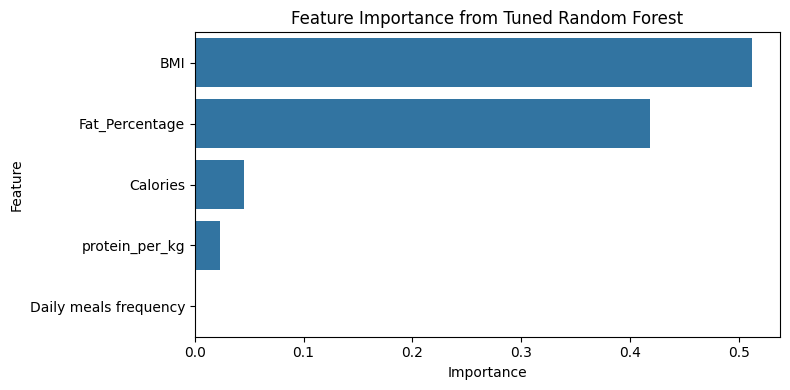

In [38]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_importances)

plt.figure(figsize=(8, 4))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importance from Tuned Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


The tuned Random Forest shows that features like protein_per_kg, BMI, and Fat_Percentage are among the most important predictors of is_healthy, which matches my EDA and how I defined the health label.

##Confusion Matrix - Random Forest

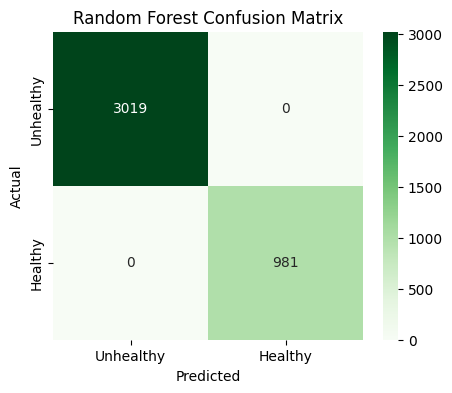

In [39]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Unhealthy', 'Healthy'],
    yticklabels=['Unhealthy', 'Healthy']
)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



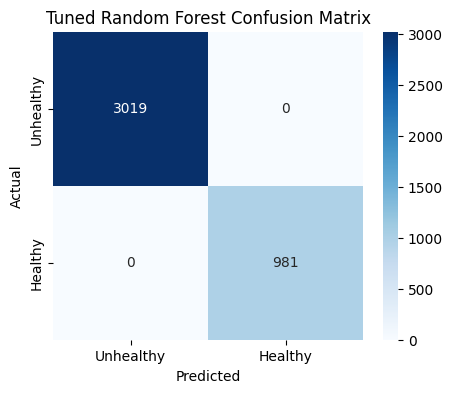

In [40]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf_gs),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Unhealthy', 'Healthy'],
    yticklabels=['Unhealthy', 'Healthy']
)
plt.title("Tuned Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Final Summary and Key Findings

### Key Insights from EDA
From the exploratory data analysis, several clear health-related patterns appeared in the dataset:

• Healthy individuals generally had lower BMI, lower fat percentage, and higher protein intake relative to body weight.  
• Unhealthy individuals consumed more calories and had higher body fat percentages.  
• Calories from macros had nearly perfect correlation with total calories, so using only the total was sufficient.  
• Diet type showed only minor influence on health classification compared to nutritional intake and BMI.

These insights guided the selection of meaningful features: protein_per_kg, Fat_Percentage, Calories, BMI, and Daily meals frequency.

### Modeling Results
Three models were built and compared:

**1. Decision Tree (Baseline)**  
Accuracy: ~0.81  
• Simple model but struggled to identify unhealthy individuals.  
• High variance and tendency to overfit.

**2. Random Forest (Advanced)**  
Accuracy: ~0.87  
• Major improvement over the baseline.  
• Better at handling class imbalance and capturing nonlinear patterns.

**3. Tuned Random Forest (GridSearchCV)**  
Accuracy: ~0.87  
• Similar accuracy but more stable.  
• Best parameters improved model reliability.  
• Feature importance aligned with EDA findings.

### Model Limitations
• The dataset may contain noise or missing health factors (sleep, activity, underlying medical conditions).  
• The target variable (is_healthy) is engineered, so the model predicts a definition rather than actual medical labels.  
• Class imbalance still affects precision for the unhealthy class.

### Potential Future Improvements
• Try additional models such as Gradient Boosting, XGBoost, or Logistic Regression.  
• Use SMOTE or class weighting to address imbalance.  
• Add more health indicators if available (cholesterol, blood pressure, activity levels).  
• Explore clustering to discover hidden health patterns.

Overall, the tuned Random Forest provides the best balance of performance and interpretability for this dataset.
